<a href="https://colab.research.google.com/github/pramanand-coder/Machine-Learning/blob/main/predicting_Species_using_the_different_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing some required library

In [1]:
import numpy as np
import pandas as pd

Reading the dataset

In [2]:
data=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/IRIS.csv')

Analysing the dataset

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Checking for the null values

In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
data.corr()

<ipython-input-9-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


**Segregating the dataset into x and y**

In [10]:
y=data['species']
x=data.drop(['species'],axis=1)
print(x.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [11]:
print(y.shape,x.shape)

(150,) (150, 4)


Spliting the dataset into train and test

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=True)

In [13]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(112, 4) (38, 4) (112,) (38,)


Fitting the Algorithm

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [15]:
from sklearn.metrics import accuracy_score
Accuracy=[]
Algorithms=[LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier,SVC,RandomForestClassifier]
for i in Algorithms:
  model=i()
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  score=accuracy_score(y_pred,y_test)
  print("Accuray Score of {0} is {1}".format(i,score*100))
  Accuracy.append(score*100)

Accuray Score of <class 'sklearn.linear_model._logistic.LogisticRegression'> is 97.36842105263158
Accuray Score of <class 'sklearn.tree._classes.DecisionTreeClassifier'> is 97.36842105263158
Accuray Score of <class 'sklearn.neighbors._classification.KNeighborsClassifier'> is 100.0
Accuray Score of <class 'sklearn.svm._classes.SVC'> is 97.36842105263158
Accuray Score of <class 'sklearn.ensemble._forest.RandomForestClassifier'> is 97.36842105263158


[]

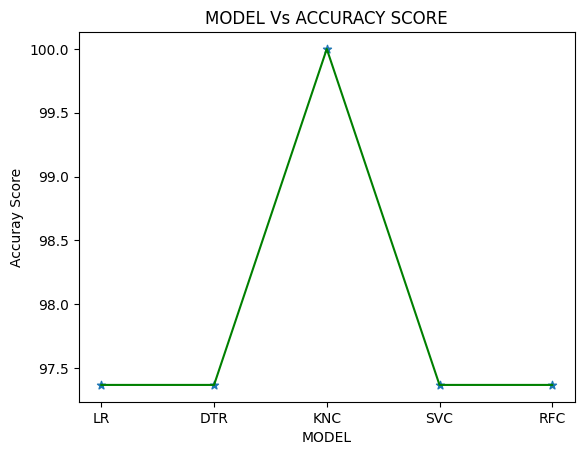

In [27]:
import matplotlib.pyplot as plt
x=["LR","DTR","KNC","SVC","RFC"]
plt.plot(x,Accuracy,color="green")
plt.scatter(x,Accuracy,marker="*")
plt.title("MODEL Vs ACCURACY SCORE")
plt.xlabel("MODEL")
plt.ylabel("Accuray Score")
plt.plot()

**So we will train our dataset using RandomForestClassifier Algorithm**


In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [18]:
model.coef_

array([[-0.4301062 ,  0.79551215, -2.30765059, -0.95781009],
       [ 0.6275482 , -0.41931083, -0.20442268, -0.77842469],
       [-0.197442  , -0.37620132,  2.51207327,  1.73623478]])

In [19]:
model.intercept_

array([  9.36571052,   1.42970768, -10.79541819])

In [20]:
y_pred=model.predict(x_test)
print(y_pred)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa']


In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuray_score=",accuracy_score(y_pred,y_test)*100)

Accuray_score= 97.36842105263158


In [22]:
print("Confusion Matrix")
print(confusion_matrix(y_pred,y_test))

Confusion Matrix
[[13  0  0]
 [ 0 15  0]
 [ 0  1  9]]


In [23]:
print("Classification Report",classification_report(y_pred,y_test))

Classification Report                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38

